In [59]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/mcdonalds.csv")

**A.4 Step 4: Exploring Data**

In [60]:
df.head()    # column names along with first few values

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [61]:
df.shape    # shape of dataset

(1453, 15)

In [62]:
# Convert mcdonalds subset to a matrix
MD_x = np.matrix(df.iloc[:, 0:11])

# Convert "Yes" values to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to two decimal places
column_means = np.round(np.mean(MD_x, axis=0), 2)

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in range (11):
  print(column_means[0][i], "of respondnts perceive McDonald's as", features[i])

0.55 of respondnts perceive McDonald's as yummy
0.91 of respondnts perceive McDonald's as convenient
0.09 of respondnts perceive McDonald's as spicy
0.87 of respondnts perceive McDonald's as fattening
0.53 of respondnts perceive McDonald's as greasy
0.9 of respondnts perceive McDonald's as fast
0.6 of respondnts perceive McDonald's as cheap
0.64 of respondnts perceive McDonald's as tasty
0.36 of respondnts perceive McDonald's as expensive
0.2 of respondnts perceive McDonald's as healthy
0.24 of respondnts perceive McDonald's as disgusting


**Preprocessing**

In [63]:
# Encoding categorical data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in features:
  df[i] = label_encoder.fit_transform(df[i])

**A.5 Step 5: Extracting Segments**

A.5.1 Using k-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

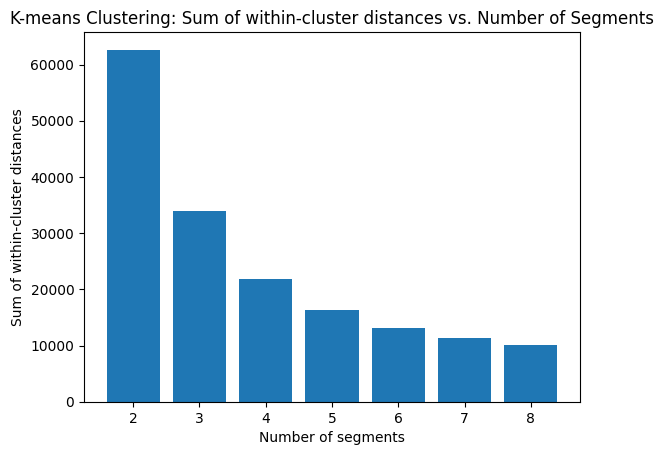

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Exclude non-numeric columns or convert them to NaN
numeric_columns = ['Like', 'Age']

# Filter the DataFrame to include only numeric columns
numeric_df = df[numeric_columns]

# Convert non-numeric values to NaN
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
numeric_df = numeric_df.dropna()

# Extract the values for clustering
X = numeric_df.values

# Initialize variables
k_range = range(2, 9)
within_cluster_distances = []

# Perform K-means clustering for different numbers of segments
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    within_cluster_distances.append(kmeans.inertia_)

# Plot the sum of within-cluster distances vs. the number of segments
plt.bar(k_range, within_cluster_distances)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within-cluster distances')
plt.title('K-means Clustering: Sum of within-cluster distances vs. Number of Segments')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

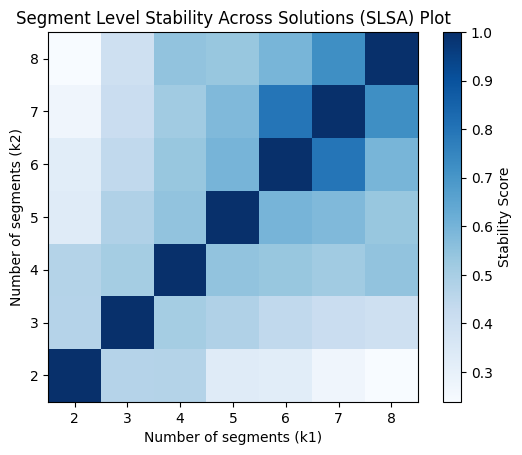

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

mcd_array = np.array(X)

# Initialize variables
k_range = range(2, 9)
stability_scores = np.zeros((len(k_range), len(k_range)))

# Perform SLSA for different numbers of segments
for i, k1 in enumerate(k_range):
    for j, k2 in enumerate(k_range):
        # Perform clustering with k1 and k2 segments
        kmeans1 = KMeans(n_clusters=k1, random_state=1234)
        kmeans2 = KMeans(n_clusters=k2, random_state=1234)

        # Fit the models and predict the cluster labels
        labels1 = kmeans1.fit_predict(mcd_array)
        labels2 = kmeans2.fit_predict(mcd_array)

        # Calculate the adjusted Rand index as the stability score
        stability_scores[i, j] = adjusted_rand_score(labels1, labels2)

# Create SLSA plot
plt.imshow(stability_scores, origin='lower', cmap='Blues')
plt.colorbar(label='Stability Score')
plt.xticks(ticks=range(len(k_range)), labels=k_range)
plt.yticks(ticks=range(len(k_range)), labels=k_range)
plt.xlabel('Number of segments (k1)')
plt.ylabel('Number of segments (k2)')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.show()

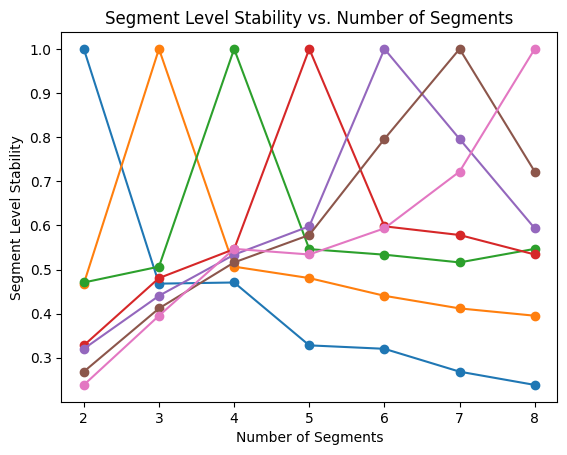

In [66]:
plt.plot(k_range, stability_scores, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability vs. Number of Segments')
plt.show()

**NOTE**

4 segment solution is selected and stored in an object of its own.

A shaded mosiac plot can be generated between this object and different features to analyse segments.